Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Offense = pd.read_csv('Offense/clean_offense.csv')
Offense.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round,Draft_Outcome
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,75,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN,8,undrafted
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,75,229,4.91,34.0,NaN,108.0,7.71,4.59,Cleveland Browns,6,drafted
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,36.0,NaN,123.0,7.22,4.16,Seattle Seahawks,6,drafted
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,NaN,76,332,5.26,29.0,28.0,97.0,7.78,4.72,Philadelphia Eagles,2,drafted
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,71,193,4.50,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,5,drafted


In [3]:
Data = Offense[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle", "Round"]]
Data2 = Data.dropna(axis='rows')
Data2.head()

,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Round
3,76,332,5.26,29.0,28.0,97.0,7.78,4.72,2
10,80,326,5.22,27.5,29.0,101.0,7.68,4.68,2
11,76,305,5.28,26.0,16.0,104.0,7.99,4.73,4
14,75,318,5.37,27.0,22.0,90.0,7.91,4.84,7
16,67,204,4.60,35.0,13.0,111.0,7.14,4.14,7


In [4]:
X = Data2[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle"]]
y = Data2["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1245, 8) (1245, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.19082064111960373
Testing Score: 0.1339017244530073


Text(0.5, 1.0, 'Residual Plot')

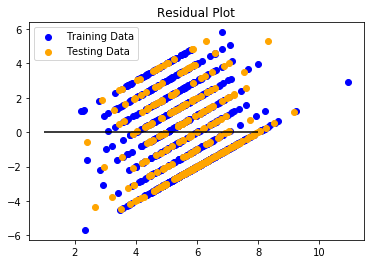

In [8]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [9]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 4.760200833759055
R-squared (R2 ): 0.18136815854886945


In [13]:
model.score(X, y)

0.18136815854886945

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
model.score(X_test, y_test)

0.1339017244530073

Logical Regression


In [20]:
XOffense = Data2.drop(columns=[ "Round", ])

In [22]:
X = XOffense
y = ["Round"]
print(X.shape, y.shape)

(1245, 8) (2910,)


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.3913840513290559
Testing Data Score: 0.39697802197802196


In [94]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [8 8 8 8 8 8 8 8 8 8]
First 10 Actual labels: [8, 4, 2, 4, 2, 8, 8, 8, 8, 7]


In [95]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,8,8
1,8,4
2,8,2
3,8,4
4,8,2
5,8,8
6,8,8
7,8,8
8,8,8
9,8,7
